In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

# EXO01

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

In [3]:
dt_classifier = DecisionTreeClassifier()

In [4]:
dt_classifier.fit(X, y)
tree_text = export_text(dt_classifier, feature_names=iris.feature_names)
print("Text Representation of Decision Tree:")
print(tree_text)

Text Representation of Decision Tree:
|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



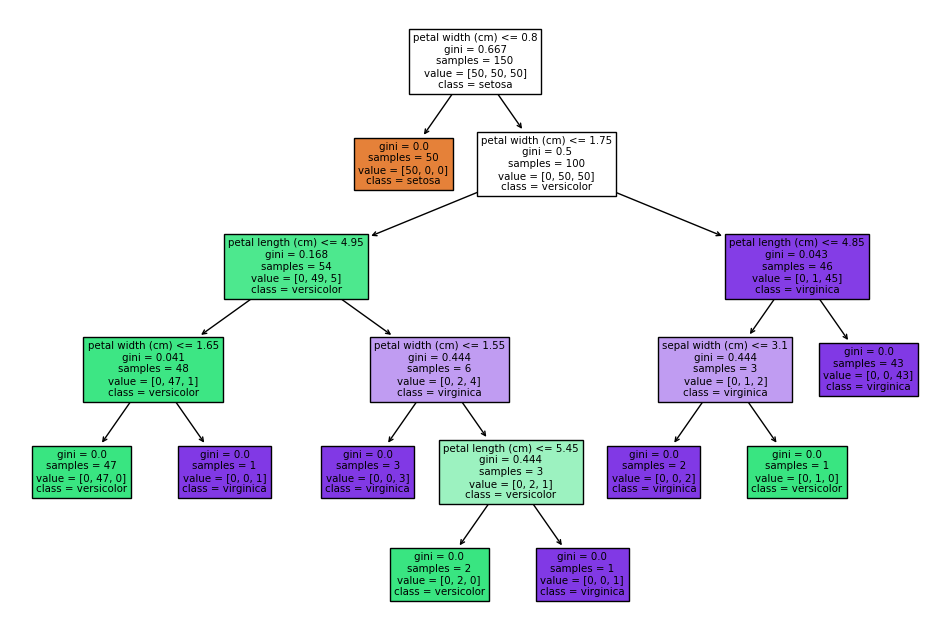

In [5]:
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
max_depths = range(2, 8)
train_scores = []
test_scores = []

In [8]:
for depth in max_depths:
    dt_classifier = DecisionTreeClassifier(max_depth=depth, criterion='entropy', random_state=42)
    dt_classifier.fit(X_train, y_train)
    train_score = dt_classifier.score(X_train, y_train)
    test_score = dt_classifier.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

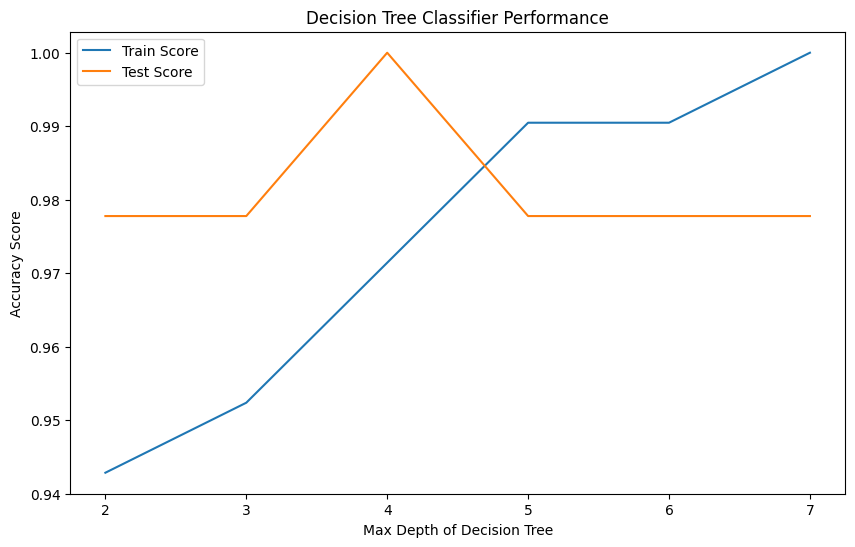

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, label='Train Score')
plt.plot(max_depths, test_scores, label='Test Score')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy Score')
plt.title('Decision Tree Classifier Performance')
plt.legend()
plt.xticks(max_depths)
plt.show()

# EXO2

In [10]:
import pandas as pd

data = {
    "Pixel": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    "Texture": [
        "Medium",
        "Fine",
        "Coarse",
        "Fine",
        "Coarse",
        "Medium",
        "Fine",
        "Coarse",
        "Medium",
        "Fine",
        "Medium",
        "Coarse",
        "Fine",
        "Coarse",
        "Coarse",
        "Fine",
    ],
    "Elevation": [
        "High",
        "Low",
        "Low",
        "Medium",
        "High",
        "High",
        "Medium",
        "High",
        "Low",
        "Medium",
        "Low",
        "Low",
        "Medium",
        "High",
        "Medium",
        "High",
    ],
    "Tone": [
        "Dark",
        "Light",
        "Dark",
        "Light",
        "Dark",
        "Dark",
        "Light",
        "Dark",
        "Dark",
        "Light",
        "Dark",
        "Light",
        "Light",
        "Dark",
        "Dark",
        "Light",
    ],
    "Pattern": [
        "Definite",
        "Vague",
        "Definite",
        "Definite",
        "Vague",
        "Definite",
        "Vague",
        "Definite",
        "Vague",
        "Definite",
        "Vague",
        "Vague",
        "Vague",
        "Definite",
        "Definite",
        "Vague",
    ],
    "Land Cover": [
        "Grassland",
        "Grassland",
        "Woodland",
        "Woodland",
        "Woodland",
        "Woodland",
        "Grassland",
        "Woodland",
        "Woodland",
        "Woodland",
        "Grassland",
        "Woodland",
        "Grassland",
        "Woodland",
        "Woodland",
        "Grassland",
    ],
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

    Pixel Texture Elevation   Tone   Pattern Land Cover
0       1  Medium      High   Dark  Definite  Grassland
1       2    Fine       Low  Light     Vague  Grassland
2       3  Coarse       Low   Dark  Definite   Woodland
3       4    Fine    Medium  Light  Definite   Woodland
4       5  Coarse      High   Dark     Vague   Woodland
5       6  Medium      High   Dark  Definite   Woodland
6       7    Fine    Medium  Light     Vague  Grassland
7       8  Coarse      High   Dark  Definite   Woodland
8       9  Medium       Low   Dark     Vague   Woodland
9      10    Fine    Medium  Light  Definite   Woodland
10     11  Medium       Low   Dark     Vague  Grassland
11     12  Coarse       Low  Light     Vague   Woodland
12     13    Fine    Medium  Light     Vague  Grassland
13     14  Coarse      High   Dark  Definite   Woodland
14     15  Coarse    Medium   Dark  Definite   Woodland
15     16    Fine      High  Light     Vague  Grassland


In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_encoded = df.apply(label_encoder.fit_transform)

In [13]:
X = df_encoded.drop(columns=['Land Cover'])
y = df_encoded['Land Cover']

In [14]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X, y)

DecisionTreeClassifier()

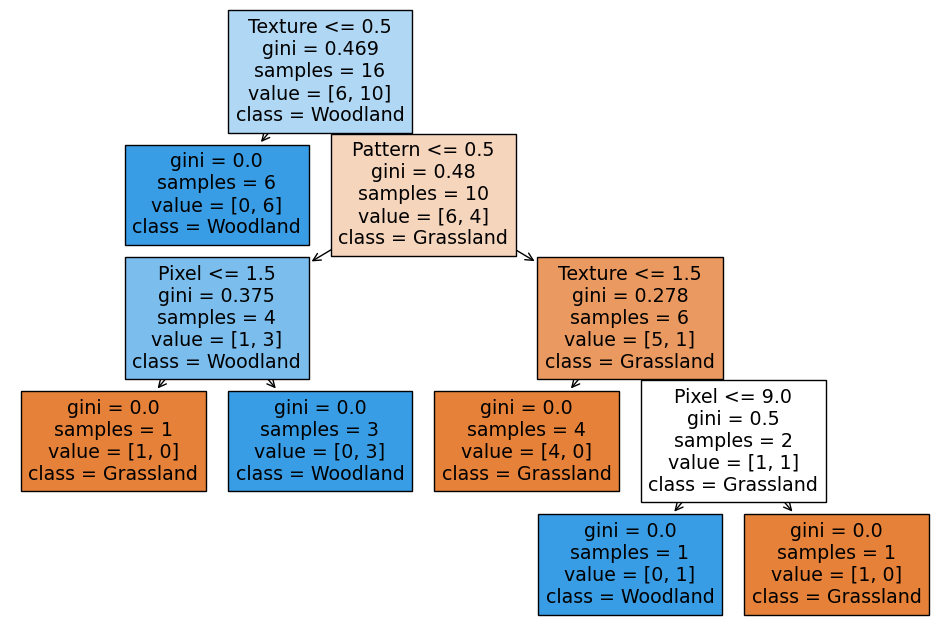

In [15]:
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=label_encoder.classes_)
plt.show()